# Simulation Experiments

This notebook is focused on using the Social Media Simulation module I developed to test whether it is possible to observe/recreate emergent phenomena in IRL social media in our simulation.

## Simulation Overview
The simulation uses a combination of Python and Pandas to create a rudimentary representation of a social media platform. Users in our simulation have two attributes:
1. Followers: a set of others users in the simulation that will be influenced by that user
2. Values: opinions on topics ranging from [-10, 10]

On each tick of our simulation, each user has a chance to make a Post on a random topic. This post influences the friends of that user based on a function of the two users' opinions on that topic. The simulation keeps each user's values in a dataframe indexed by their unique id number with the comlumns being the names of the topics. It also records these values to a csv file so trends in the simulation can be analyzed afterward with the columns `tick`, `user`, and the topics of the simuation. Information on all of the simulations parameters are available in the Simulation's readme.

## Limitations

Our simulation is limited in its application by the assumptions that:
* A user's opinion on topics can be simply represented on a 1 dimensional scale.
* A user has no influences from outside the social media site.
* Random friend generation

In [22]:
from Simulation import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def graph_topic(record, topic, save_path=None):
    values = pd.read_csv(record)
    values = values.pivot_table(topic, "tick", "user")

    # Title
    plt.title("Opinions on {} over time\n(const function)".format(topic))

    # style
    plt.style.use('seaborn-darkgrid')

    # create a color palette
    # palette = plt.get_cmap('Set1')

    iteration=0
    for column in values:
        iteration+=1
        plt.plot(values.index, values[column], marker='', linewidth=0.6, alpha=0.9, label=column)
        if iteration == 100:
            if save_path:
                plt.savefig(save_path, dpi=600)
            else:
                plt.savefig('{}.png'.format(topic), dpi=600)

## Brainstorming
### Hypothesis 1: Polarisation / Identity-Protected Cognition
### Hypothesis 2: Effects of directionality
How does directionality (followers vs. friends) effect how values change in the simulation. Is it the same in real life?
### Hypothesis 3: Effect of "campaigns"

## Constant IPC experiments

In [91]:
pd.read_csv(r"C:\Users\Ruben\Desktop\AIPSimulation-Python\Experiments\const_ipc\posts.csv")

,user,topic,tick
0,9,tp2,0
1,12,tp2,0
2,14,tp2,0
3,18,tp1,0
4,28,tp1,0
...,...,...,...
1554,36,tp1,300
1555,39,tp3,300
1556,43,tp2,300
1557,44,tp3,300


In [90]:
params = r"C:\Users\Ruben\Desktop\AIPSimulation-Python\Experiments\const_ipc\ipc_const.json"
sim = Simulation(params)
sim.run()

Beginning tick 300, 100.0% complete.
Finshed.


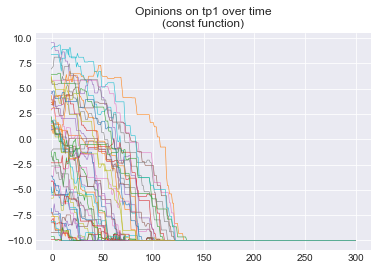

In [29]:
graph_topic("./Experiments/const_ipc/values.csv", "tp1")

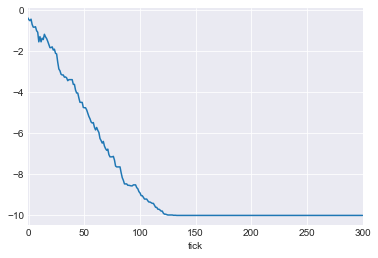

In [44]:
vals = pd.read_csv("./Experiments/const_ipc/values.csv")
vals.groupby('tick')['tp1'].mean().plot(kind="line")

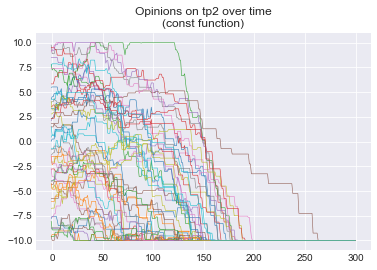

In [47]:
graph_topic("./Experiments/const_ipc/values.csv", "tp2")

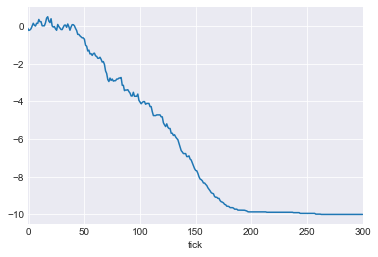

In [45]:
vals.groupby('tick')['tp2'].mean().plot(kind="line")

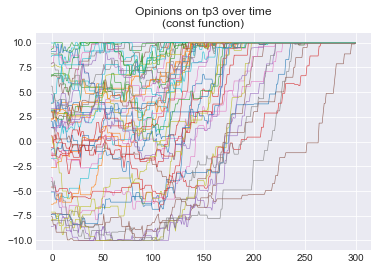

In [49]:
graph_topic("./Experiments/const_ipc/values.csv", "tp3")

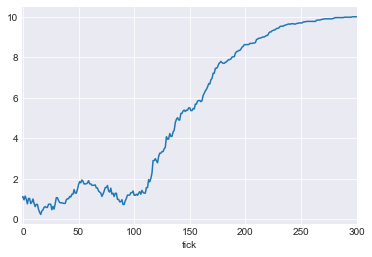

In [46]:
vals.groupby('tick')['tp3'].mean().plot(kind="line")

Is the final average predictable using the inital average?

In [54]:
params = r"C:\Users\Ruben\Desktop\AIPSimulation-Python\Experiments\const_ipc\ipc_const100.json"
const_100_topics = Simulation(params)
# const_100_topics.run()

Beginning tick 300, 100.0% complete.
Finshed.


In [83]:
values100 = pd.read_csv("./Experiments/const_ipc/values100.csv")
values100.groupby('tick')["1"].mean()#.groupby("tick")["1"].mean().plot(kind='line')

tick
-1     -0.43621
 0     -0.43621
 1     -0.43621
 2     -0.43621
 3     -0.43621
         ...   
 296   -1.50765
 297   -1.50765
 298   -1.50765
 299   -1.50765
 300   -1.50765
Name: 1, Length: 302, dtype: float64

In [89]:
values100

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,tick,user
0,0.976270,4.303787,2.055268,0.897664,-1.526904,2.917882,-1.248256,7.835460,9.273255,-2.331170,...,-7.364043,4.326544,-4.211878,-6.336173,1.730259,-9.597849,6.578801,-9.906090,-1,0
1,3.556331,-4.599841,4.703880,9.243771,-5.024937,1.523147,1.840839,1.445038,-5.538367,9.054980,...,-6.276140,8.887448,4.791016,-0.190824,-5.451707,-4.912870,-8.839417,-1.311667,-1,1
2,-3.764082,3.926870,-2.444963,-6.407926,-9.506425,-8.655007,3.587855,-0.926063,0.731584,7.933426,...,6.442355,-6.203042,0.226380,-5.513659,-8.043110,7.243830,9.458390,9.216693,-1,2
3,8.131110,5.480947,-3.337097,-8.377972,-1.855177,-5.355317,-7.350247,-8.931456,4.511887,-9.771451,...,-4.826319,6.980766,-9.333907,9.179654,-2.892623,-2.865862,-9.673430,-6.295353,-1,3
4,-1.974810,8.585828,-8.007701,8.906031,7.389771,-0.916752,-3.465982,-5.345117,2.289294,-9.338508,...,7.935223,-1.865333,1.041566,-4.566945,-0.891117,-1.965729,-5.031731,0.117328,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,-2.459257,4.755051,-2.270909,5.737367,5.539134,-2.671553,-0.970970,0.182462,-9.051008,-7.654063,...,10.000000,0.310351,-1.412207,9.017774,-10.000000,-0.750329,4.737613,-0.799610,300,45
15096,-3.909392,1.379946,-1.675526,-3.852345,-4.991034,-3.217065,8.647953,8.058981,-7.749218,3.792217,...,1.536619,-7.432116,3.794036,-0.058806,-5.140734,6.814682,1.615989,-8.444031,300,46
15097,0.869935,-5.594758,8.249559,-6.749443,4.054998,-8.304395,9.470123,-3.073033,1.211675,-6.299968,...,-8.499117,-4.733409,3.545534,1.860036,-1.388504,-7.328751,-4.156983,1.137838,300,47
15098,-3.726911,10.000000,1.445688,-2.844357,8.234311,-7.550132,-5.829639,-6.593398,8.774178,4.257578,...,7.764513,-6.024596,-2.646162,5.561444,-2.411414,2.264523,9.001313,-9.024936,300,48


In [ ]:
values100 = pd.read_csv("./Experiments/const_ipc/values100.csv").groupby('tick')
ticks = values100.mean().drop(columns='user')
# Title
plt.title("Opinions on {} over time\n(const function)".format(topic))

# style
plt.style.use('seaborn-darkgrid')

iteration=0
for column in values:
    iteration+=1
    plt.plot(values.index, values[column], marker='', linewidth=0.6, alpha=0.9, label=column)
    if iteration == 100:
        if save_path:
            plt.savefig(save_path, dpi=600)
        else:
            plt.savefig('{}.png'.format(topic), dpi=600)

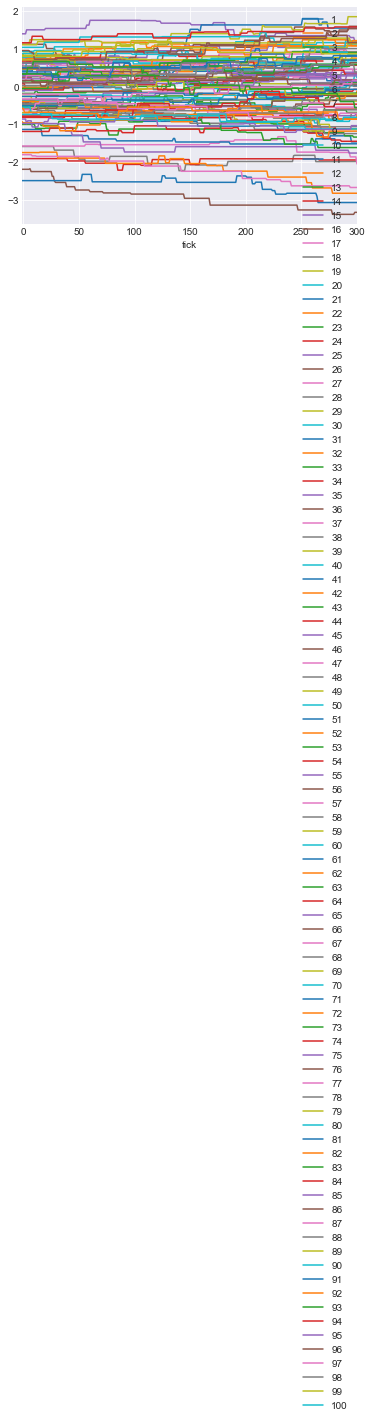